# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18612087,
   'total_supply': 18612087,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 29786.0,
     'volume_24h': 46698710839,
     'market_cap': 552670459880,
     'percentage_change_1h': -2.41760792332283,
     'percentage_change_24h': -7.70776094401746,
     'percentage_change_7d': -17.5000997628993,
     'percent_change_1h': -2.41760792332283,
     'percent_change_24h': -7.70776094401746,
     'percent_change_7d': -17.5000997628993},
    'CAD': {'price': 38006.936,
     'volume_24h': 59587555030.564,
     'market_cap': 705207506806.88,
     'percent_change_1h': -2.41760792332283,
     'percent_change_24h': -7.70776094401746,
     'percent_change_7d': -17.5000997628993}},
   'last_updated': 1611773968}},
 'metadata': {'timestamp': 1611773968,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [6]:
btc_value = btc_data['data']['1']['quotes']['USD']['price']
print(btc_value)

29786.0


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114427484,
   'total_supply': 114427484,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1230.58,
     'volume_24h': 36534614287,
     'market_cap': 140855278516,
     'percentage_change_1h': -2.22578021497188,
     'percentage_change_24h': -7.84216049008479,
     'percentage_change_7d': -11.0519511478564,
     'percent_change_1h': -2.22578021497188,
     'percent_change_24h': -7.84216049008479,
     'percent_change_7d': -11.0519511478564},
    'CAD': {'price': 1570.22008,
     'volume_24h': 46618167830.212,
     'market_cap': 179731335386.416,
     'percent_change_1h': -2.22578021497188,
     'percent_change_24h': -7.84216049008479,
     'percent_change_7d': -11.0519511478564}},
   'last_updated': 1611773934}},
 'metadata': {'timestamp': 1611773934,
  'num_cryptocurrencies': 1371,
  'error': None}}

In [8]:
eth_value = eth_data['data']['1027']['quotes']['USD']['price']
print(eth_value)

1230.58


In [9]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35743.20
The current value of your 5.3 ETH is $6522.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
amount_data = {
    'amount':[(my_btc_value+my_eth_value),(my_spy_value+my_agg_value)]
}

assets = ['crypto','shares']

df_savings = pd.DataFrame(amount_data, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,42265.274
shares,42728.000


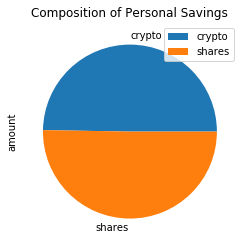

In [16]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',title='Composition of Personal Savings')

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [19]:
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = (my_agg_value+my_spy_value+my_btc_value+my_eth_value) 
total_savings


84993.27399999999

In [20]:
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f'Congratulations! You have more than enough money in your emergency fund.')
if total_savings == emergency_fund:
    print(f'Congratulations! You reached your financial goal.')
if total_savings < emergency_fund:
    print(f'You need to add ${emergency_fund-total_savings:0.2f} to your emergency fund.')

Congratulations! You have more than enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500
MC_stocks = MCSimulation(portfolio_data=df_stock_data,
                           weights=[.40,.60],
                           num_simulation=num_sims,
                           num_trading_days=252*30)

In [24]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stocks.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000833,0.992043,0.999924,0.994819,1.003582,1.000954,1.009394,1.005073,1.010431,0.992708,...,0.995236,1.011589,1.004495,1.003940,1.006854,1.002700,0.997667,1.003238,1.002751,0.996094
2,1.010413,0.995773,1.001205,0.982619,0.997196,1.007793,1.016483,1.004778,0.994418,0.983196,...,1.003961,1.011575,1.012004,1.021104,1.009885,1.008481,1.012512,0.999840,0.995232,1.001163
3,1.018671,1.005896,1.011856,0.983250,0.995769,1.008537,1.014353,1.003969,1.002658,0.979699,...,0.993026,1.015450,1.016432,1.023055,1.017230,1.027765,1.004526,0.993020,0.979710,0.997670
4,1.004639,1.003086,1.022084,0.996401,0.998139,1.005880,1.021053,1.001552,1.000358,0.977000,...,0.981614,1.018870,1.010850,1.011672,1.025475,1.025289,0.995945,0.996753,0.980788,1.005306
5,1.011023,1.011568,1.027240,0.988395,1.016172,1.012977,1.015048,1.005294,1.004133,0.970189,...,0.974348,1.012340,0.998303,1.017879,1.030027,1.034103,0.985115,1.004536,0.973059,1.004167
6,1.008316,1.018747,1.013826,0.992741,1.015184,1.011301,1.009245,1.006562,1.003073,0.975882,...,0.975358,1.012678,1.007981,1.019855,1.023156,1.036836,0.980074,1.005485,0.972931,0.996620
7,1.019699,1.018022,1.005039,0.998593,1.022678,1.018519,1.008246,1.002283,1.005690,0.979223,...,0.968103,1.009077,1.016781,1.013064,1.025252,1.045782,0.982130,0.999328,0.971782,1.008086
8,1.032563,1.010084,1.000280,1.007289,1.020158,1.020009,1.006665,1.007360,1.003740,0.982043,...,0.963779,1.018635,1.005809,1.004736,1.020101,1.048188,0.993983,1.009540,0.976180,1.007948
9,1.033353,1.010781,0.989082,1.009751,1.022889,1.004833,1.004499,1.015464,1.019032,0.994082,...,0.969526,1.021520,1.008303,1.007434,1.009473,1.044766,1.000245,1.018259,0.982092,1.008027


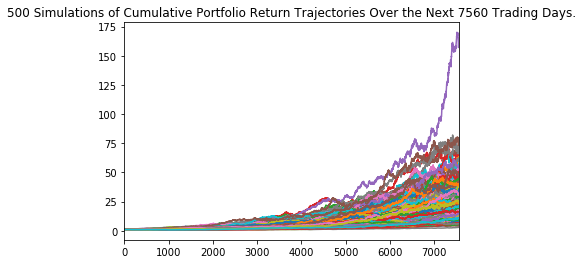

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_MC_stocks=MC_stocks.plot_simulation()

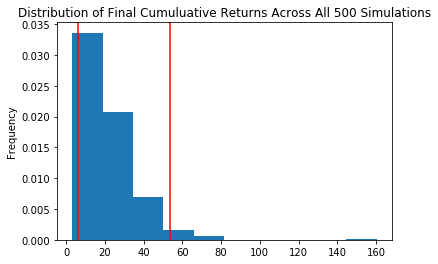

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_MC_stocks=MC_stocks.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats_stocks=MC_stocks.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_stocks)

count           500.000000
mean             21.640989
std              14.177780
min               3.102232
25%              12.300464
50%              17.953381
75%              28.134618
max             160.191792
95% CI Lower      6.214048
95% CI Upper     53.610394
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(summary_stats_stocks[8]*initial_investment,2)
ci_upper=round(summary_stats_stocks[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $124280.97 and $1072207.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower2=round(summary_stats_stocks[8]*initial_investment2,2)
ci_upper2=round(summary_stats_stocks[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $186421.45 and $1608311.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stocks_five = MCSimulation(portfolio_data=df_stock_data,
                           weights=[.20,.80],
                           num_simulation=num_sims,
                           num_trading_days=252*5)
MC_stocks_five.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stocks_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006150,1.006999,0.984262,0.993641,0.989998,0.994746,0.990197,0.991624,0.992712,0.984299,...,1.011699,1.008865,1.005765,1.006016,0.997972,1.007231,0.999674,1.017302,1.000536,1.007809
2,0.987188,0.994865,0.988692,1.002869,1.001223,1.004015,0.998864,0.992164,0.982505,0.973483,...,1.018584,1.003026,1.007157,1.000726,1.010934,1.006986,0.994152,1.039631,0.966425,1.018977
3,0.985518,1.009856,0.976096,1.004195,1.019698,1.013093,0.977758,0.994539,0.990670,0.962592,...,1.022412,1.001182,1.021215,0.993811,1.020791,1.013550,1.004967,1.041695,0.960034,1.009421
4,0.979004,1.019142,0.953275,1.022395,1.033267,1.012733,0.950330,1.000901,0.981618,0.945916,...,1.015760,1.012719,1.038008,0.999560,1.013143,0.993523,1.020854,1.015472,0.968371,1.027398
5,0.981567,0.998037,0.949167,1.037876,1.031217,1.001699,0.940839,0.997474,0.996655,0.945628,...,1.011811,1.026299,1.039749,1.005950,1.019364,0.996745,1.013370,0.992099,0.965185,1.024569
6,0.989956,0.993078,0.960148,1.033225,1.034751,1.000261,0.937594,1.003895,0.999843,0.947914,...,1.007445,1.016389,1.039298,1.012635,1.014854,0.997722,1.011890,0.998294,0.954147,1.029314
7,0.985865,0.994179,0.967826,1.039466,1.058316,0.975145,0.948025,1.016559,0.993512,0.939721,...,0.991743,1.031190,1.055643,1.021550,1.000073,1.003240,1.003145,0.982540,0.964412,1.016556
8,0.994680,1.008030,0.986116,1.040131,1.059380,0.968470,0.938230,0.998925,1.001073,0.932064,...,0.993172,1.046682,1.033186,1.020623,1.013057,1.003950,1.002675,0.991044,0.964113,0.992508
9,1.015258,1.003198,0.994753,1.044080,1.053096,0.962004,0.953641,0.995680,0.990394,0.934895,...,1.018560,1.036100,1.023292,1.018965,1.023672,1.014602,0.995125,0.974505,0.969160,0.992467


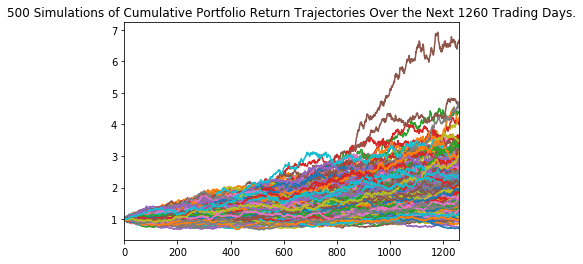

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_MC_stocks_five=MC_stocks_five.plot_simulation()

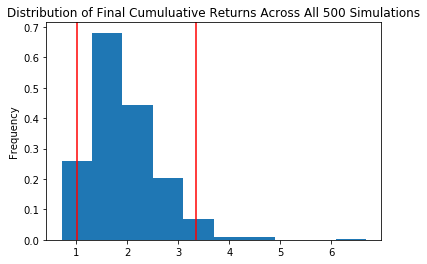

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_MC_stocks_five=MC_stocks_five.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats_five=MC_stocks_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_five)

count           500.000000
mean              1.934033
std               0.671294
min               0.713659
25%               1.476294
50%               1.813225
75%               2.277320
max               6.674910
95% CI Lower      1.006227
95% CI Upper      3.350576
Name: 1260, dtype: float64


In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five=round(summary_stats_five[8]*initial_investment_five,2)
ci_upper_five=round(summary_stats_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60373.63 and $201034.59


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stocks_ten = MCSimulation(portfolio_data=df_stock_data,
                           weights=[.20,.80],
                           num_simulation=num_sims,
                           num_trading_days=252*10)
MC_stocks_ten.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stocks_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001787,0.997219,0.994942,0.991999,1.017324,0.996528,0.998483,0.998546,1.004559,1.001662,...,0.998696,0.997684,1.009778,1.001995,0.999361,1.008684,1.011934,0.994055,1.006910,1.008623
2,1.006416,1.007820,1.002936,1.010399,1.016217,0.995609,1.011393,1.000623,1.009979,0.995040,...,0.993854,1.007170,1.012702,1.005859,0.997157,1.014194,1.015658,0.987861,1.007916,1.003310
3,1.005445,1.013251,0.982552,1.024403,1.021356,0.981583,1.013713,0.970417,1.003645,0.999021,...,0.998844,1.014933,1.024095,1.012637,0.995826,1.004325,1.019608,0.983631,1.011525,1.015062
4,1.005318,1.003622,0.980842,1.013657,1.037115,0.991751,1.008951,0.978790,1.004736,1.017481,...,1.004320,1.014547,1.045680,1.002128,0.997346,1.008643,1.034658,0.987094,1.008462,1.006619
5,1.018237,0.990580,0.986682,1.013246,1.037480,1.010766,1.024628,0.974271,1.016205,1.028144,...,1.007143,1.001050,1.036477,0.999111,1.004472,1.008047,1.032970,0.974643,0.995344,1.023079
6,1.008293,0.994057,0.999818,1.021251,1.043291,1.003929,1.051856,0.966813,1.013237,1.046756,...,1.000872,1.016088,1.051692,0.993990,0.996391,1.003393,1.031683,0.974710,1.001435,1.035967
7,1.016378,0.993556,0.998728,1.009292,1.033362,1.005306,1.067937,0.989315,1.004794,1.036930,...,0.993314,1.003741,1.041967,0.994927,0.994394,0.998706,1.034392,0.975622,1.010304,1.034079
8,1.031315,0.997020,0.998335,1.013167,1.042660,0.994853,1.052363,0.983473,0.997181,1.035426,...,1.003967,1.004710,1.056255,1.001343,1.005290,1.002739,1.045527,0.976727,1.009642,1.044060
9,1.043091,1.003561,0.987056,1.013982,1.050139,0.989038,1.053118,0.978544,0.990474,1.041429,...,1.007545,1.005239,1.056274,0.997729,1.006867,0.993953,1.047175,0.977430,1.019306,1.058977


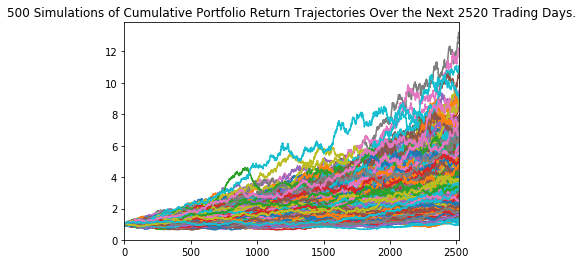

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stocks_ten.plot_simulation()

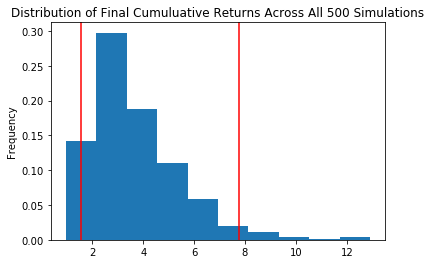

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stocks_ten.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats_ten=MC_stocks_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_ten)

count           500.000000
mean              3.676658
std               1.724680
min               0.952397
25%               2.488195
50%               3.271787
75%               4.540849
max              12.920288
95% CI Lower      1.531539
95% CI Upper      7.771207
Name: 2520, dtype: float64


In [42]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(summary_stats_ten[8]*initial_investment_ten,2)
ci_upper_ten=round(summary_stats_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $91892.35 and $466272.45
